# Vergleich der Methoden Roberta-base-sentiment VS vaderSentiment

In [1]:
# Load Packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('output_sentiment.csv')

## KDE Plot - Density of Polarity

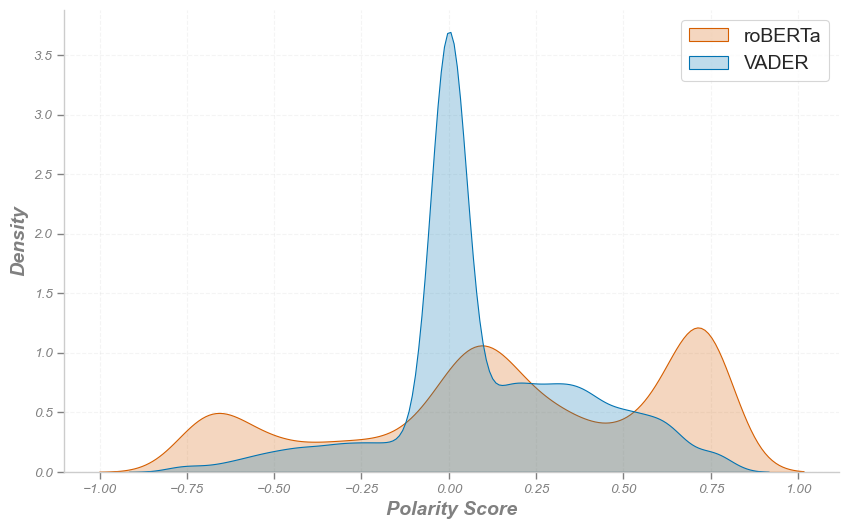

In [6]:
fig = plt.figure(figsize=(10, 6))
sns.set("paper", "whitegrid", "colorblind")
sns.kdeplot(df["roberta_polarity"], color="r", fill=True, legend="roberta_polarity")
sns.kdeplot(df["vader_polarity"], color="b", fill=True, legend="vader_polarity")
sns.despine(right=True, top=True)
plt.tick_params(
    reset=True,
    top=False,
    right=False,
    color="gray",
    labelcolor="gray",
    grid_alpha=0.2,
    grid_linestyle="--",
)
plt.xticks(**{"fontsize": 14, "font": "Arial", "fontstyle": "italic"})
plt.yticks(**{"fontsize": 14, "font": "Arial", "fontstyle": "italic"})
plt.xlabel(
    "Polarity Score",
    font="Arial",
    fontstyle="italic",
    weight="bold",
    fontsize=14,
    color="gray",
)
plt.ylabel(
    "Density",
    font="Arial",
    fontstyle="italic",
    weight="bold",
    fontsize=14,
    color="gray",
)
plt.legend(["roBERTa", "VADER"], bbox_to_anchor=(1, 1.0), fontsize=14)


plt.show()


## Pie Chart - Verteilung der Sentiment Labels

In [4]:
vader_positive = df["vader_label"].value_counts().get("positive", 0)
roberta_positive = df["roberta_label"].value_counts().get("positive", 0)
vader_neutral = df["vader_label"].value_counts().get("neutral", 0)
roberta_neutral = df["roberta_label"].value_counts().get("neutral", 0)
vader_negative = df["vader_label"].value_counts().get("negative", 0)
roberta_negative = df["roberta_label"].value_counts().get("negative", 0)


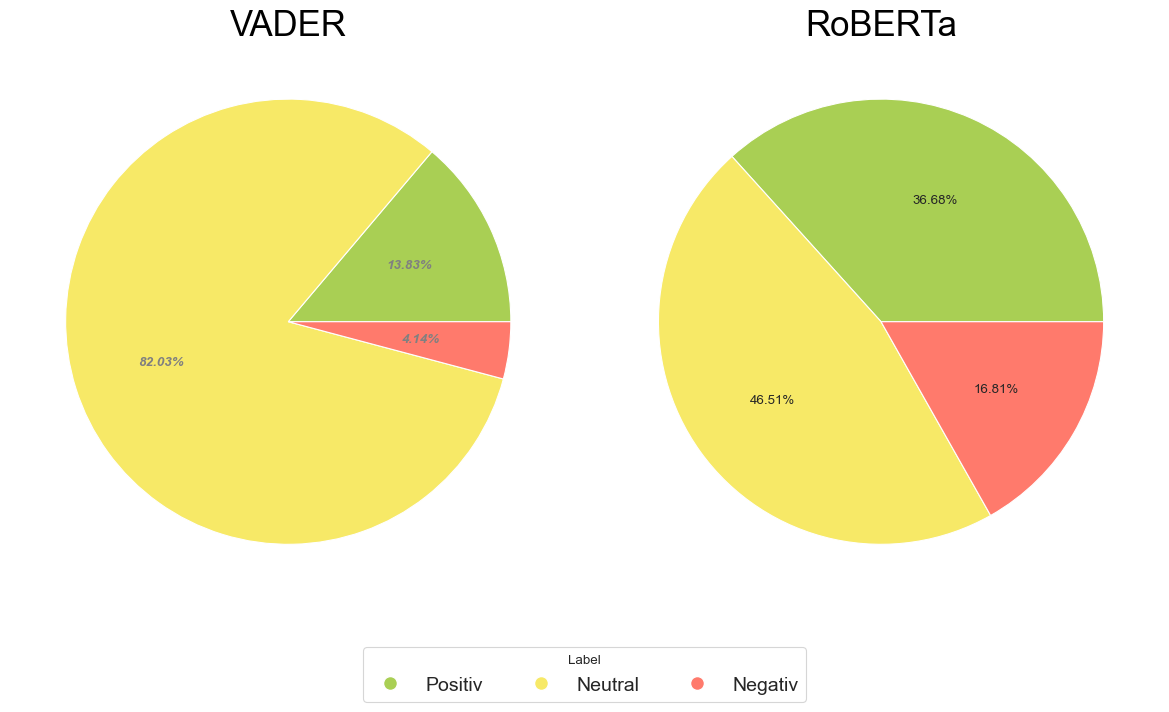

In [ ]:
labels = ['Positiv', 'Neutral', 'Negativ']
vader_sizes = [vader_positive, vader_neutral, vader_negative]
roberta_sizes = [roberta_positive, roberta_neutral, roberta_negative]

colors = ["#A9CF54", "#F7E967", "#ff7a6c"]

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].pie(vader_sizes, autopct="%.2f%%", colors=colors,
            textprops={"fontsize": 100, "font": "Arial", "fontstyle": "italic", 
                       "weight": "bold", "color": "gray"})
axes[0].set_title("VADER", fontsize=25, color="black")

axes[1].pie(roberta_sizes, autopct="%.2f%%", colors=colors,
            textprops={"fontsize": 100, "font": "Arial", "fontstyle": "italic", 
                       "weight": "bold", "color": "gray"})
axes[1].set_title("RoBERTa", fontsize=25, color="black")

for ax in axes:
    ax.set_ylabel("")  

handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) for color in colors]
fig.legend(handles, labels, loc='center', bbox_to_anchor=(0.5, -0.1), ncol=3, fontsize=14, title="Label")

plt.tight_layout()
plt.show()


## Process Time

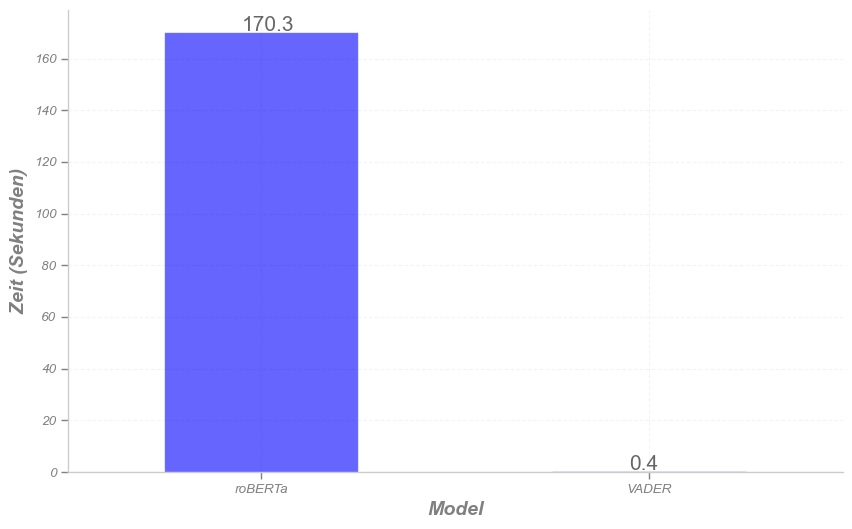

In [28]:
pd.DataFrame({"model": ["roBERTa", "VADER"], "Prediction Time": [170.3, 0.4]}).plot(
    kind="bar", figsize=(10, 6), alpha=0.6, color="blue"
)
sns.despine(right=True, top=True)
plt.tick_params(
    reset=True,
    top=False,
    right=False,
    color="gray",
    labelcolor="gray",
    grid_alpha=0.2,
    grid_linestyle="--",
)
plt.xticks(
    range(2),
    ["roBERTa", "VADER"],
    **{"fontsize": 20, "font": "Arial", "fontstyle": "italic"},
)
plt.yticks(**{"fontsize": 20, "font": "Arial", "fontstyle": "italic"})
plt.xlabel(
    "Model",
    font="Arial",
    fontstyle="italic",
    weight="bold",
    fontsize=14,
    color="grey",
)
plt.ylabel(
    "Zeit (Sekunden)",
    font="Arial",
    fontstyle="italic",
    weight="bold",
    fontsize=14,
    color="grey",
)
plt.legend("", frameon=False)
for index, data in enumerate([170.3, 0.4]):
    plt.text(
        x=index - 0.05,
        y=data + 0.5,
        s=f"{data}",
        fontdict=dict(fontsize=15, color="black", alpha=0.6),
    )
plt.show()